# FLO Customer Segmentation with RFM Analysis

**FLO, who make shoe sales both online and offline, wants to create segments for its existing customer to come up with a business plan.**

**In this case RFM Analysis will be conducted to segment customers.**

### ***Variables***
**master_id** = Unique customer id

**order_channel** = Which platform used for shopping (Android, ios, Desktop, Mobile)

**last_order_channel** = Platform used for the last shopping activity

**first_order_date** = First order date of the customer

**last_order_date** = Last order date of the customer

**last_order_date_online** = Last online order date of the customer

**last_order_date_offline** = Last offline order date of the customer

**order_num_total_ever_online**= Number of unique online orders customer have made

**order_num_total_ever_offline** = Number of unique offline orders customer have made

**customer_value_total_ever_offline** = Amount of money paid by customer for offline orders

**customer_value_total_ever_online** = Amount of money paid by customer for online orders

**interested_in_categories_12** = Categories in which customer has shopped from for the last 12 months

## Understanding and Preparation of Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Firstly, let's read read our data and make a copy of it so that we won't have to read the data each time we want the original data

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",500)
pd.set_option("display.float_format",lambda x:"%.3f"%x)
df_=pd.read_csv(r"C:\Users\ONUR\flo_data_20k.csv")
df=df_.copy()

In [3]:
df.head(2)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"


In [4]:
#Number of rows and columns
df.shape

(19945, 12)

In [5]:
#First 10 observation
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.000,2.000,150.870,49.990,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.000,1.000,59.990,315.940,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.000,1.000,49.990,113.640,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.000,2.000,120.480,934.210,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.000,1.000,69.980,95.980,"[KADIN, AKTIFSPOR]"


In [6]:
#Columns names
list(df.columns)

['master_id',
 'order_channel',
 'last_order_channel',
 'first_order_date',
 'last_order_date',
 'last_order_date_online',
 'last_order_date_offline',
 'order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online',
 'interested_in_categories_12']

In [7]:
# Descriptive statistics about numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.000,3.111,4.226,1.000,1.000,2.000,4.000,200.000
order_num_total_ever_offline,19945.000,1.914,2.063,1.000,1.000,1.000,2.000,109.000
customer_value_total_ever_offline,19945.000,253.923,301.533,10.000,99.990,179.980,319.970,18119.140
customer_value_total_ever_online,19945.000,497.322,832.602,12.990,149.980,286.460,578.440,45220.130


In [8]:
#Check if there is any null values within columns which may cause corruption in the data
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [9]:
df.dtypes
# Most of the object type variables consist of dates. We should therefore turn these object types to datetime later.
# Float type varibles reveals insights about the amount of sale numbers and frequencies.
# interested_in_categories_12 which is also an object datatype returns list of categories that customer is interested in

master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object

In [10]:
# Unique number of customer_id and row numbers are equal. This leads us to believe that each row represent a unique customer.
df.master_id.nunique()

19945

In [11]:
# Now we merge online and offline sales numbers and frequincies into two variables:
# customer_value_total_ever_omnichannel,order_num_total_ever_omnichannel
df["customer_value_total_ever_omnichannel"]=df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
df["order_num_total_ever_omnichannel"]=df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df.head(4)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,customer_value_total_ever_omnichannel,order_num_total_ever_omnichannel
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],939.370,5.000
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2013.550,21.000
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",585.320,5.000
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",121.970,2.000


In [12]:
# Transforming columns containing "date" string to datetime datatype from object.
date_columns=[date_col for date_col in df.columns if "date" in date_col]
df[date_columns]=df[date_columns].apply(lambda x: pd.to_datetime(x,infer_datetime_format=True))

In [13]:
df.dtypes

master_id                                        object
order_channel                                    object
last_order_channel                               object
first_order_date                         datetime64[ns]
last_order_date                          datetime64[ns]
last_order_date_online                   datetime64[ns]
last_order_date_offline                  datetime64[ns]
order_num_total_ever_online                     float64
order_num_total_ever_offline                    float64
customer_value_total_ever_offline               float64
customer_value_total_ever_online                float64
interested_in_categories_12                      object
customer_value_total_ever_omnichannel           float64
order_num_total_ever_omnichannel                float64
dtype: object

### The distribution of many attributes on different platforms

Android App    9495
Mobile         4882
Ios App        2833
Desktop        2735
Name: order_channel, dtype: int64


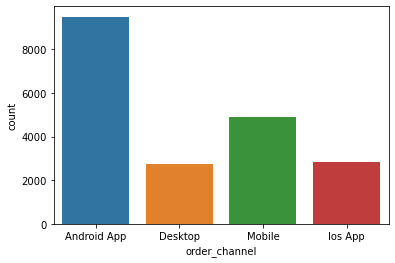

In [14]:
print(df["order_channel"].value_counts())
sns.countplot(x=df["order_channel"])

               order_num_total_ever_omnichannel
order_channel                                  
Android App                           52269.000
Desktop                               10920.000
Ios App                               15351.000
Mobile                                21679.000


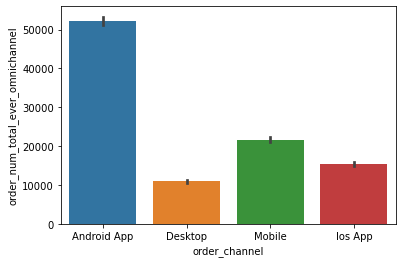

In [15]:
# People tend to prefer Desktop over other platforms while shopping
print(df.groupby("order_channel").agg({"order_num_total_ever_omnichannel":"sum"}))
sns.barplot(data=df,x="order_channel",y="order_num_total_ever_omnichannel",estimator=sum)

In [16]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12', 'customer_value_total_ever_omnichannel',
       'order_num_total_ever_omnichannel'],
      dtype='object')

               customer_value_total_ever_omnichannel
order_channel                                       
Android App                              7819062.760
Desktop                                  1610321.460
Ios App                                  2525999.930
Mobile                                   3028183.160


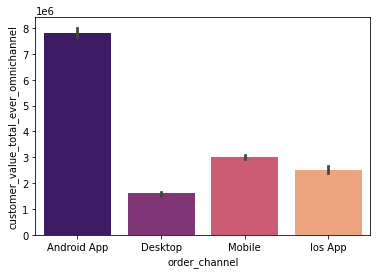

In [17]:
print(df.groupby("order_channel").agg({"customer_value_total_ever_omnichannel":"sum"}))
sns.barplot(data=df,x="order_channel",y="customer_value_total_ever_omnichannel",estimator=sum,palette="magma")

In [18]:
# Sorting the customers based on their number of shopping
df.sort_values("customer_value_total_ever_omnichannel",ascending=False).head(10)[["master_id","customer_value_total_ever_omnichannel",
                                                                                "order_num_total_ever_omnichannel"]]

,master_id,customer_value_total_ever_omnichannel,order_num_total_ever_omnichannel
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.100,202.000
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.290,68.000
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.100,82.000
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.410,11.000
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.340,4.000
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.570,70.000
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,16918.570,70.000
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.100,37.000
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,12282.240,131.000
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,12103.150,20.000


In [19]:
# Let's see the top 10 customers with the highest value
df.sort_values("order_num_total_ever_omnichannel",ascending=False).head(10)[["master_id","customer_value_total_ever_omnichannel",
                                                                             "order_num_total_ever_omnichannel"]]

,master_id,customer_value_total_ever_omnichannel,order_num_total_ever_omnichannel
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.100,202.000
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,12282.240,131.000
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,10383.440,111.000
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,8572.230,88.000
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,4240.360,83.000
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.100,82.000
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,5184.050,77.000
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,5297.880,75.000
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,16918.570,70.000
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.570,70.000


## Functionalization of data preparation part

In [20]:
def data_preparation(dataframe):
    #Turning columns which contains date string into datetime datatype. They were object at the beginning!
    date_columns=[date_col for date_col in dataframe.columns if "date" in date_col]
    dataframe[date_columns]=dataframe[date_columns].apply(lambda x: pd.to_datetime(x,infer_datetime_format=True))
    #Creating two new variables representing the sum of online and offline purchase both in
    #respect to frequency and value created
    dataframe["customer_value_total_ever_omnichannel"]=dataframe["customer_value_total_ever_offline"] + dataframe["customer_value_total_ever_online"]
    dataframe["order_num_total_ever_omnichannel"]=dataframe["order_num_total_ever_online"] + dataframe["order_num_total_ever_offline"]
    return dataframe

In [21]:
data_preparation(df)
df.head(2)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,customer_value_total_ever_omnichannel,order_num_total_ever_omnichannel
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],939.370,5.000
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2013.550,21.000


### *Our data is now ready for setting up RFM metrics*

* **Recency**: It's related to customer's last interaction with the company. How recent was the customer's last interaction.
* **Frequency**: It represent the number of interactions between customer and the company has made so far.
* **Monetary**: It represents the monetary contribution of the customer to the company through these interactions.
> Together these three parameters represent RFM itself.

In [22]:
# We need to define an analyse date to compute recency metric. Analyse date should be at least two days later than the last purchase date.
last_purchase=df["last_order_date"].max()
last_purchase

Timestamp('2021-05-30 00:00:00')

In [23]:
# Analyse date is determined to be two days later than the latest purchase date.
analyse_date=last_purchase + pd.to_timedelta(3, unit='D') 
analyse_date

Timestamp('2021-06-02 00:00:00')

In [24]:
df.head(1)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,customer_value_total_ever_omnichannel,order_num_total_ever_omnichannel
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],939.370,5.000


In [44]:
rfm=df.groupby("master_id").agg({"last_order_date": lambda last_order: (analyse_date-last_order.max()).days,
                                 "order_num_total_ever_omnichannel": lambda x: x,
                                 "customer_value_total_ever_omnichannel": lambda y:y
                                })

In [45]:
# Without scaling these numbers do not give insights about the customers. We must scale them
# so that even the outliers will become interpretable.
rfm.columns=["recency","frequency","monetary"]
rfm.head()

,recency,frequency,monetary
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.000,776.070
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.000,269.470
000be838-85df-11ea-a90b-000d3a38a36f,214,4.000,722.690
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.000,874.160
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.000,1620.330


## Creating RFM Scores

In [ ]:
# Firstly, let's start with why we turn metrics into scalable scores:
## RFM Metrics are hard to interpret without scoring them into a group since
## if we try to observe one observation we will just see a number and nothing else to compare.
## RFM Score tackles this problem by scoring them based on the percentage they take place in.
## When we see a recency score of 5 we will know regardless of looking other observations that
## this observation has high score on recency and a purchase made recently.

In [27]:
rfm["frequency_score"]=pd.qcut(rfm["frequency"].rank(method="first"),5,labels=[1,2,3,4,5])
rfm["recency_score"]=pd.qcut(rfm["recency"],5,labels=[5,4,3,2,1])
rfm["monetary_score"]=pd.qcut(rfm["monetary"],5,labels=[1,2,3,4,5])
rfm.head()

,recency,frequency,monetary,frequency_score,recency_score,monetary_score
master_id,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.000,776.070,4,5,4
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.000,269.470,2,1,1
000be838-85df-11ea-a90b-000d3a38a36f,214,4.000,722.690,3,2,4
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.000,874.160,4,5,4
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.000,1620.330,4,5,5


In [28]:
# Combining recency_score and frequency_score into one variable called RF_Score
rfm["RF_Score"]=rfm["recency_score"].astype(str)+rfm["frequency_score"].astype(str)
rfm.head()

,recency,frequency,monetary,frequency_score,recency_score,monetary_score,RF_Score
master_id,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.000,776.070,4,5,4,54
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.000,269.470,2,1,1,12
000be838-85df-11ea-a90b-000d3a38a36f,214,4.000,722.690,3,2,4,23
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.000,874.160,4,5,4,54
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.000,1620.330,4,5,5,54


## Segmentation based on RF Scores

In [29]:
#Firstly we should define Segments for RF Scores
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [30]:
# Creating a new variable called segment and placing customers into segments they belong to
rfm["segment"]=rfm["RF_Score"].replace(to_replace=seg_map,regex=True)
rfm.head(15)

,recency,frequency,monetary,frequency_score,recency_score,monetary_score,RF_Score,segment
master_id,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.000,776.070,4,5,4,54,champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.000,269.470,2,1,1,12,hibernating
000be838-85df-11ea-a90b-000d3a38a36f,214,4.000,722.690,3,2,4,23,at_Risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.000,874.160,4,5,4,54,champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.000,1620.330,4,5,5,54,champions
00136ce2-a562-11e9-a2fc-000d3a38a36f,204,2.000,359.450,1,2,2,21,hibernating
00142f9a-7af6-11eb-8460-000d3a38a36f,26,3.000,404.940,2,5,2,52,potential_loyalists
0014778a-5b11-11ea-9a2c-000d3a38a36f,27,3.000,727.430,2,5,4,52,potential_loyalists
0018c6aa-ab6c-11e9-a2fc-000d3a38a36f,127,2.000,317.910,1,3,2,31,about_to_sleep


## Comprehensive Analysis of Customer Segments

In [31]:
rfm[["segment","recency","frequency","monetary"]].groupby("segment").agg(["sum","mean"]).columns

MultiIndex([(  'recency',  'sum'),
            (  'recency', 'mean'),
            ('frequency',  'sum'),
            ('frequency', 'mean'),
            ( 'monetary',  'sum'),
            ( 'monetary', 'mean')],
           )

In [32]:
# As can be seen below frequency is highly related to monetary since the more you go shopping the more you will spend.
# Can't loose segment is a cruical customer group we need to be aware of. They consist of  a big part of our revenue therefore some actions must be to keep them.
rfm[["segment","recency","frequency","monetary"]].groupby("segment").agg(["sum","mean"]).sort_values(( 'monetary', 'mean'),ascending=False)

recency         frequency           monetary         
                        sum    mean       sum   mean         sum     mean
segment                                                                  
cant_loose           281974 236.159 12796.000 10.717 1769093.020 1481.652
champions             34833  18.142 17213.000  8.965 2708561.160 1410.709
loyal_customers      282008  83.558 28203.000  8.356 4104868.130 1216.257
at_Risk              766973 243.329 14090.000  4.470 2043520.520  648.325
need_attention        91914 114.037  3014.000  3.739  446069.930  553.437
potential_loyalists  110769  37.870  9684.000  3.311 1561193.430  533.741
hibernating          891602 248.426  8583.000  2.391 1301311.460  362.583
about_to_sleep       188997 115.032  3954.000  2.407  594189.920  361.649
new_customers         12771  18.976  1346.000  2.000  231545.310  344.049
promising             39876  59.695  1336.000  2.000  223214.430  334.153

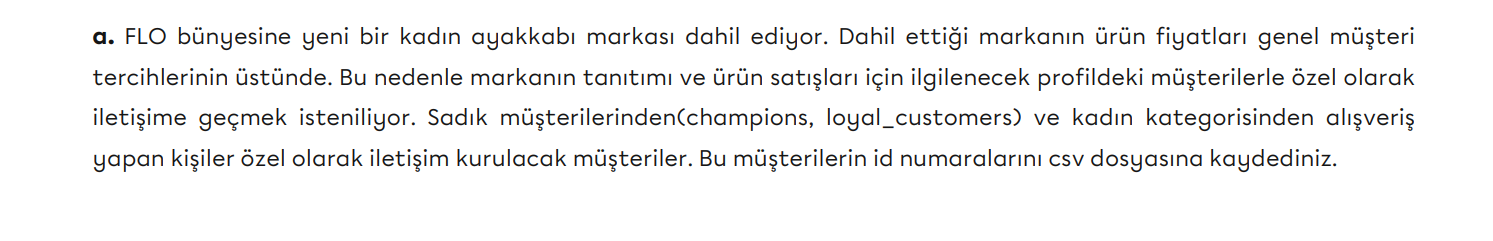

In [33]:
#Getting the Master Id's from rfm dataframe
segment_bool=rfm[(rfm["segment"] == "champions") | (rfm["segment"]=="loyal_customers")].index
segment_bool

Index(['00016786-2f5a-11ea-bb80-000d3a38a36f',
       '000c1fe2-a8b7-11ea-8479-000d3a38a36f',
       '000f5e3e-9dde-11ea-80cd-000d3a38a36f',
       '003903e0-abce-11e9-a2fc-000d3a38a36f',
       '004bec18-9f7a-11e9-a2fc-000d3a38a36f',
       '004d5204-2037-11ea-87bf-000d3a38a36f',
       '00534fe4-a6b4-11e9-a2fc-000d3a38a36f',
       '006633b6-a6b9-11e9-a2fc-000d3a38a36f',
       '0067708e-1ec6-11ea-aa32-000d3a38a36f',
       '00736820-a834-11e9-a2fc-000d3a38a36f',
       ...
       'ffa4683a-2007-11ea-87bf-000d3a38a36f',
       'ffa8ed4e-a7a1-11e9-a2fc-000d3a38a36f',
       'ffbbd2fe-ad3e-11e9-a2fc-000d3a38a36f',
       'ffcfc4d8-a1bf-11e9-a2fc-000d3a38a36f',
       'ffd73136-b098-11e9-9757-000d3a38a36f',
       'ffdd5eb8-aee9-11e9-a2fc-000d3a38a36f',
       'ffe0ab60-6c79-11ea-9ddf-000d3a38a36f',
       'ffe5c7e8-ee12-11e9-9346-000d3a38a36f',
       'ffefdd18-77ca-11ea-9b70-000d3a38a36f',
       'fffacecc-ddc3-11e9-a848-000d3a38a36f'],
      dtype='object', name='master_id', length=5

In [34]:
# Finding the rows in df that contains the customer ids in the segment bool
segment_bool_df=df[pd.Series([x in segment_bool for x in df["master_id"]])]
segment_bool_df

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,customer_value_total_ever_omnichannel,order_num_total_ever_omnichannel
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],939.370,5.000
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2013.550,21.000
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.000,2.000,120.480,934.210,"[ERKEK, COCUK, KADIN]",1054.690,5.000
11,c2e15af2-9eed-11e9-9897-000d3a38a36f,Android App,Android App,2015-07-05,2021-05-19,2021-05-19,2020-07-10,19.000,1.000,90.490,2771.110,"[COCUK, KADIN, AKTIFSPOR]",2861.600,20.000
14,241f0ad0-afb5-11e9-9757-000d3a38a36f,Ios App,Ios App,2018-12-28,2021-05-30,2021-05-30,2019-10-20,23.000,1.000,139.000,4274.290,"[ERKEK, AKTIFSPOR]",4413.290,24.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19921,1b18778e-aa04-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-06-01,2021-04-23,2021-04-23,2019-08-27,8.000,1.000,169.980,1575.500,[AKTIFSPOR],1745.480,9.000
19922,ba5cd8c2-b142-11e9-9757-000d3a38a36f,Ios App,Offline,2018-10-13,2021-03-13,2020-05-12,2021-03-13,10.000,1.000,17.990,1480.460,[ERKEK],1498.450,11.000
19926,7e1c15be-6298-11ea-9861-000d3a38a36f,Android App,Android App,2019-02-16,2021-05-22,2021-05-22,2020-03-06,6.000,2.000,310.700,1062.390,"[KADIN, AKTIFSPOR]",1373.090,8.000
19931,c81bac06-b1f4-11e9-89fa-000d3a38a36f,Android App,Android App,2019-07-23,2021-04-07,2021-04-07,2020-02-12,7.000,2.000,99.980,1081.740,"[COCUK, AKTIFSPOR]",1181.720,9.000


In [35]:
# We need to combine this new query with a second condition which is buying products from woman category
woman_segment_bool_df=segment_bool_df[segment_bool_df["interested_in_categories_12"].str.contains("KADIN")]
woman_segment_bool_df["master_id"].to_csv("Woman_segment_boolean.csv")

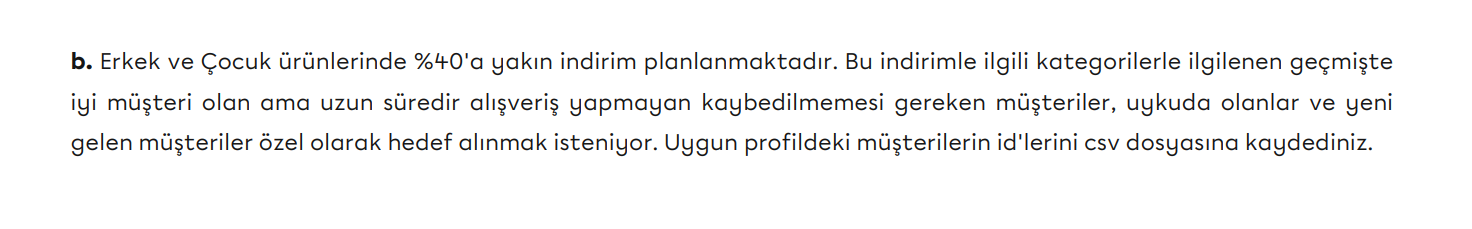

In [36]:
rfm.segment.unique()

array(['champions', 'hibernating', 'at_Risk', 'potential_loyalists',
       'about_to_sleep', 'new_customers', 'need_attention',
       'loyal_customers', 'cant_loose', 'promising'], dtype=object)

In [37]:
rfm[(rfm["segment"]=="cant_loose")|(rfm["segment"]=="hibernating")|(rfm["segment"]=="new_customers")].index

Index(['00034aaa-a838-11e9-a2fc-000d3a38a36f',
       '00136ce2-a562-11e9-a2fc-000d3a38a36f',
       '0022f41e-5597-11eb-9e65-000d3a38a36f',
       '00263f1a-210a-11ea-b50a-000d3a38a36f',
       '0033f078-7359-11ea-92d0-000d3a38a36f',
       '003705ee-a800-11e9-a2fc-000d3a38a36f',
       '005c7914-9e78-11e9-9897-000d3a38a36f',
       '006981e0-66eb-11ea-82da-000d3a38a36f',
       '006bb20e-a9a8-11e9-a2fc-000d3a38a36f',
       '007cdfe4-1f54-11ea-87bf-000d3a38a36f',
       ...
       'ff0e2222-a81a-11e9-a2fc-000d3a38a36f',
       'ff2ba51e-a9cc-11e9-a2fc-000d3a38a36f',
       'ff44ba3a-1372-11ea-a001-000d3a38a36f',
       'ff6dccd0-471c-11ea-b6c0-000d3a38a36f',
       'ff7c2456-2f16-11ea-8467-000d3a38a36f',
       'ff839e5e-1fdd-11ea-87bf-000d3a38a36f',
       'ffc47e38-003d-11eb-8341-000d3a38a36f',
       'ffce3990-26be-11ea-aaaa-000d3a38a36f',
       'ffd1553a-1ed0-11ea-81ff-000d3a38a36f',
       'ffe7e6e4-5bb9-11ea-a4ac-000d3a38a36f'],
      dtype='object', name='master_id', length=5

#### Creating a new dataframe and appointing these customer id's. After that this dataframe will be transformed to a csv file.

In [38]:
q2_df=pd.DataFrame()
q2_df["Customer_ID"]=rfm[(rfm["segment"]=="cant_loose")|(rfm["segment"]=="hibernating")|(rfm["segment"]=="new_customers")].index
q2_df.head()

,Customer_ID
0,00034aaa-a838-11e9-a2fc-000d3a38a36f
1,00136ce2-a562-11e9-a2fc-000d3a38a36f
2,0022f41e-5597-11eb-9e65-000d3a38a36f
3,00263f1a-210a-11ea-b50a-000d3a38a36f
4,0033f078-7359-11ea-92d0-000d3a38a36f


In [39]:
# Transforming dataframe to csv
q2_df.to_csv("%40 discount segments.csv")